In [77]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

In [257]:
#df = pd.read_csv('C:/Users/URIEL/Documents/DIPLOMADO TECNICAS ESTADISTICAS Y MINERIA DE DATOS/Modulo 1/dengue_abierto.csv')
df = pd.read_csv('C:/Users/XMX5634/Documents/TE-MD-master/Modulo 1/dengue_abierto.csv')

In [258]:
def tabla_frecuencias(df,col):
    #construir una tabla de frecuencias. 
    
    rating_counts = (df.groupby(col).agg(frec_absoluta=(col, "count"))).sort_values(['frec_absoluta'], ascending = False)
    
    rating_counts["frec_absoluta_acumulada"] = rating_counts["frec_absoluta"].cumsum()

    
    rating_counts['frec_relativa'] = rating_counts['frec_absoluta'].apply(lambda x: x/rating_counts['frec_absoluta'].sum())
    rating_counts['frec_relativa(%)'] = rating_counts['frec_relativa'].apply(lambda x: x*100 )

    
    
    rating_counts['frec_relativa_acumulada'] = rating_counts['frec_absoluta_acumulada'].apply(lambda x: x/rating_counts['frec_absoluta'].sum())  
    rating_counts['frec_relativa_acumulada(%)'] = rating_counts['frec_relativa_acumulada'].apply(lambda x: x*100)

    
    return rating_counts

In [270]:
aux2 = tabla_frecuencias(df,'ENTIDAD_RES')[['frec_absoluta','frec_relativa(%)', 'frec_relativa_acumulada(%)']]

In [275]:
len(aux2)

32

In [273]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

trace1 = go.Bar(
    x=[str(x) for x in aux2.index],
    y=aux2['frec_absoluta'],
    name='frec_absoluta',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Scatter(
    x=[str(x) for x in aux2.index],
    y=aux2['frec_relativa_acumulada(%)'],
    name='fre_relativa_acumulada',
    yaxis='y2'

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title =  'Entidades Federativas - Diagrama Pareto',xaxis=dict(
      tickangle=-90
    ))


fig.show()


In [237]:
aux2 = tabla_frecuencias(df,'ENTIDAD_RES')[['frec_absoluta','frec_relativa(%)', 'frec_relativa_acumulada(%)']]

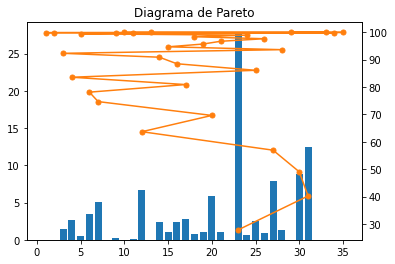

In [238]:
fig, ax = plt.subplots()
ax.bar(aux2.index.astype('object'), aux2["frec_relativa(%)"], color="C0")
ax2 = ax.twinx()
ax2.plot(aux2.index.astype('object'), aux2["frec_relativa_acumulada(%)"], color="C1", marker="o", ms=5)
plt.title('Diagrama de Pareto')
plt.xlabel('Entidades Federativas')
plt.show() 

In [242]:
type(aux2.index.astype('object')[0])

int